#                                       Correlation and Plotting

##  Correlation (r)

- Correlation is a value used to denote the relationship between two variables
- It ranges from -1 to +1
- When x increases and y increases, x decreases and y decreases, it is called positive or direct correlation
- When x increases and y decreases and vice versa, it can be called as negative or indirect correlation
- As the value of r increases from 0.1 to 0.7 and so on, its strength increases along the way
- The pearson's product moment correlation is used only when the variables are continous
- Variability of the variables play a major role in correlation
- If one variable is has a restricted variability, then the correlation might not show as intended.
- It is the variability of the variable that is compared, hence a diverse range of values for both variables would result in a good measure of correlation.
- The correlation is not always linear, it can be curvilinear and can take other trends respectively.
- When we sqaure the value of the correlation we get the co-efficient of determination. 
- If r is 0.70, then we can say that 49% of variability of x can be explained by the variability of y
- Co-effiecient of non-determination or alienation means that 51% of the variability of x cannot be explained by the variability of y.
- Correlation does not represent causality. It does not say that x causes y.
- Clear hypothesis and research in the form of control group is required to establish causality.
- There is something called as partial correlation.
- When the confounding variables are controlled, or removed that type of correlation is called partial correlation

| X        | Y         | Type of correlation                 |
|----------|-----------|-------------------------------------|
| Nominal  | Nominal   | Phi coefficient                     |
| Nominal  | Ordinal   | Rank Biserial coefficient           |
| Nominal  | Interval  | Point Biserial coefficient          |
| Ordinal  | Ordinal   | Spearman's correlation coefficient  |
| Ordinal  | Interval  | Pearson's correlation coefficient   |
| Interval | Interval  | Pearson's correlation coefficient   |


In [35]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
#Importing the dataset

piaz = pd.read_csv("C:/Users/Nandhika/Documents/GitHub_Projects_Statistics/data/dataset/education/piazza.csv")

#Displaying the first 5 observations from the dataset

piaz.head()

,uid,days online,views,contributions,questions,notes,answers
0,u00,49,162,144,0,67,22
1,u01,29,299,5,1,1,0
2,u02,57,299,0,0,0,0
3,u03,47,262,30,15,2,6
4,u04,27,101,1,1,0,0


- Here the "days online" is on an interval scale and the rest of the variables except the "uid" are measured in the ratio scale

In [37]:
#Finding the correlation
p_corr = piaz.corr()
p_corr

,days online,views,contributions,questions,notes,answers
days online,1.000000,0.802639,0.264104,0.410242,0.191373,0.247133
views,0.802639,1.000000,0.326555,0.374499,0.206177,0.318957
contributions,0.264104,0.326555,1.000000,0.014879,0.910507,0.983952
questions,0.410242,0.374499,0.014879,1.000000,-0.105520,-0.023743
notes,0.191373,0.206177,0.910507,-0.105520,1.000000,0.916590
answers,0.247133,0.318957,0.983952,-0.023743,0.916590,1.000000


- From this we can easily see the variables which are strongly correlated 
- Views and days online seems to correlated
- The contributions seems to be highly correlated with notes and answers
- Notes and answers seem to have a good standing correlation

<AxesSubplot:>

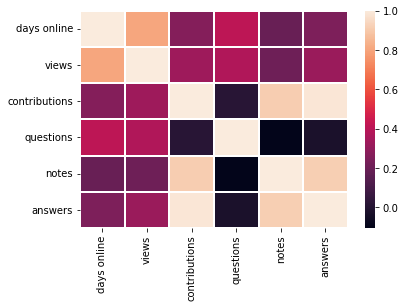

In [38]:
#Visualizing the correlation using heatmap
sns.heatmap(p_corr,linecolor="white",linewidth=0.2)

#### **Pair Plot and PairGrid**

- This plot offers to plot the relationship between two variables and also the univariate distribution among them
- The hue parameter enables us to identify different categories 
- The hue_kws (keyword argument) enables us to modify the categorical variable with respect to some other attributes like markers.
- Setting the corner to true will remove the redundancy of plots
- The height and aspect is used to adjust the height and width of the plots
- The despine argument can be set to either True or False to remove the top and right spines from the plots
- The dropna would drop the missing values from the data before plotting

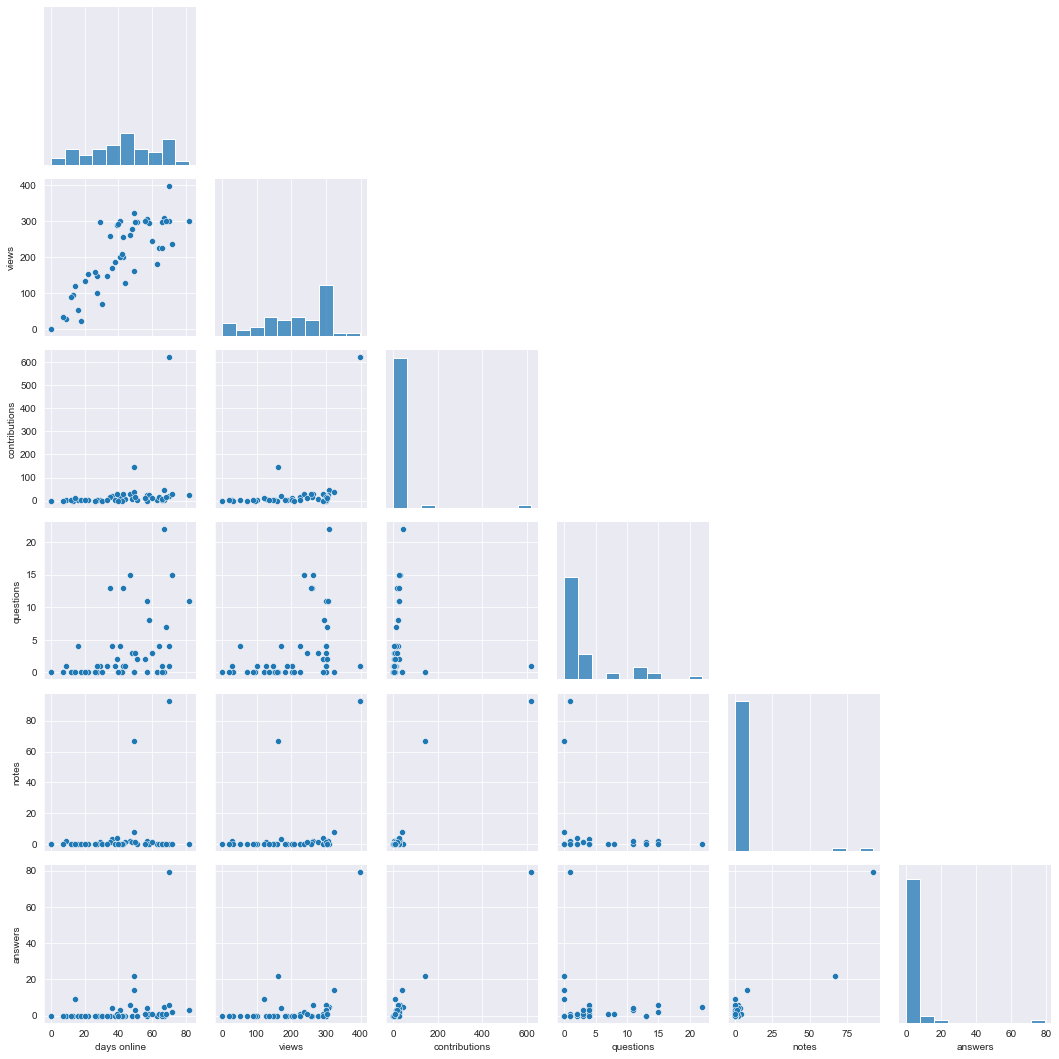

In [54]:
sns.set_style("darkgrid")
g = sns.PairGrid(piaz,corner=True, despine=True)
g.map_diag(sns.histplot,bins=10)
g.map_offdiag(sns.scatterplot)
#sns.pairplot(data=piaz)

#### **Joint Plot**

- This plot offers to plot the relationship between two variables and also the univariate distribution of both of them
- The hue parameter enables us to identify different categories 
- The kind argument lets us decide the type of plot, to plot.
- The scatter, hex, hist, kde and reg and residual plot.
- The ratio, height and space argument is used to adjust the size.
- The marginal_kws=dict(bins=25, fill=False) is used for thy.
- The dropna would drop the missing values from the data before plotting.

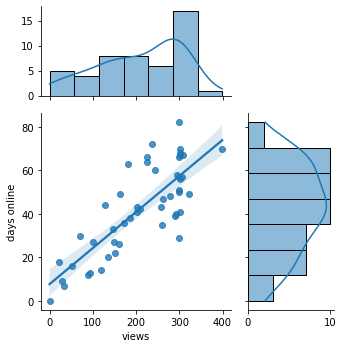

In [40]:
sns.jointplot(data=piaz,x="views",y="days online",kind="reg",height=5,ratio=2,marginal_ticks=True)

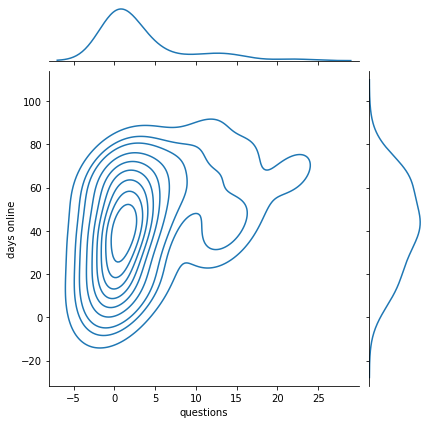

In [22]:
sns.jointplot(data=piaz,x="questions",y="days online",kind="kde")

#### **Displot**

- The displot had been deprecated and has been replaced by Displot and histplot
- The kind argument allows for different types of plots like hist and kde
- The empirical cummulative distribution function tells us the proportion of values that lie below a certain value.
- The other measures of central tendency would not be intutuive from the graph
- The rugplot is another kind, which allows us to know the population of the points. It plots each and every point on the respective axis
- The other arguments are log_scale, kwargs and so on

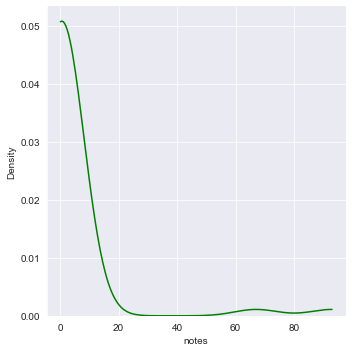

In [70]:
'''Note: Here the data would start with -20, though there are no negative values in the actual feature. This is because the kde is a smoothening function and 
it can extend beyond the given data points if the data points are sparse near the edges.The cut argument is used to manage
this problem here'''

sns.displot(data=piaz,x="notes",kind="kde",color="green",cut=0)

#sns.displot(data=piaz,x="notes",kind="kde",color="green")

#### **Stripplot**

- The stripplot is based on the swarmplot, violinplot and boxplot.
- It shows the distribution of a numerical variable along a categorical axis
- It is useful to identify patterns and trends within categories
- An important argument here is the jitter which introduces an random noise accross the scatterplot so that the points are not overlapping on each other.
- The jitter can be adjusted accordingly by setting it to true
- The hue and hue order are the other important arguments.
- When the dodge argument is set to true, that is when hthe plots are plotted separately for each hue.

This would be the end of Part -4 in Sadly Statistics. I am admitting that I am humbly learning statistics and may I request you to pardon me if there are any mistakes. I also really look forward to you, if you would be able to point out and correct my errors!